# Explortatory Data Analysis

##### Importing Libraries and reading dataset

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('sales.csv')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [57]:
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 9800
Number of columns : 18


##### Data Cleaning

In [58]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [59]:
# Changing Order Date and Ship Date to datetime

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Sales'] = df['Sales'].round(2) 

In [121]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,9800.0,230.769036,626.651878,0.44,17.25,54.49,210.605,22638.48


In [60]:
# Checking Duplicates

df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [61]:
df.drop_duplicates(inplace=True)

# removed duplicate row

In [62]:
# dropping un-necessary columns

df.drop(['Row ID','Order ID','Customer ID','Postal Code'], axis=1, inplace=True)

In [63]:
# Checking for Null Values

df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [123]:
# Checking for distinct values

df.nunique()

Order Date       1230
Ship Date        1326
Ship Mode           4
Customer Name     793
Segment             3
Country             1
City              529
State              49
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5395
dtype: int64

##### Data Visualization

Finding top 30 customers which generate the higest revenue

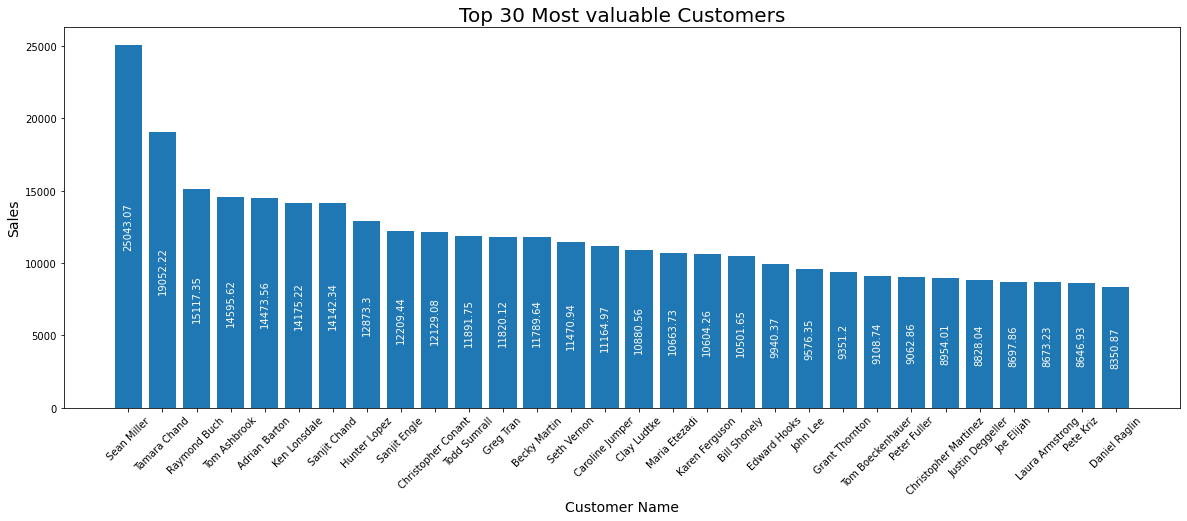

In [83]:
customers = df.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False).head(30)
customers.reset_index(inplace=True)
customers['Sales'] = customers['Sales'].round(2)

plt.figure(figsize=(20,7))
plt.title('Top 30 Most valuable Customers', fontsize = 20)
bars = plt.bar(customers['Customer Name'],customers['Sales'])
plt.xlabel('Customer Name', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, str(bar.get_height()), ha='center', va='center', color='white', rotation=90)

plt.show()



Finding top 10 cities which generate the higest revenue


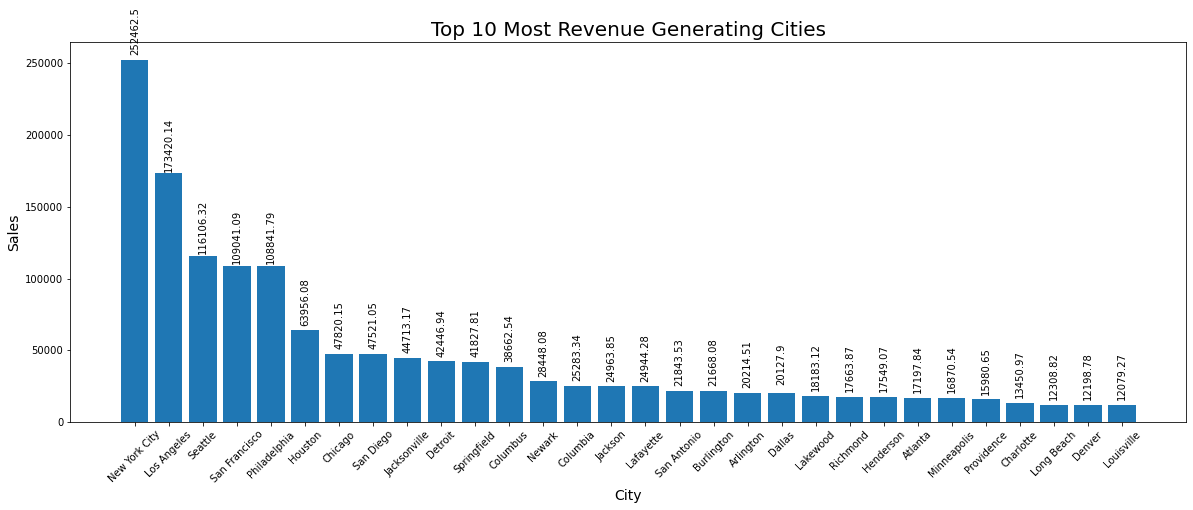

In [93]:
cities = df.groupby(['City']).sum().sort_values('Sales', ascending=False).head(30)
cities.reset_index(inplace=True)
cities['Sales'] = cities['Sales'].round(2)

plt.figure(figsize=(20,7))
plt.title('Top 10 Most Revenue Generating Cities', fontsize = 20)
bars = plt.bar(cities['City'],cities['Sales'])
plt.xlabel('City', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+20000, str(bar.get_height()), ha='center', va='center', rotation=90)

plt.show()

Sales by Region

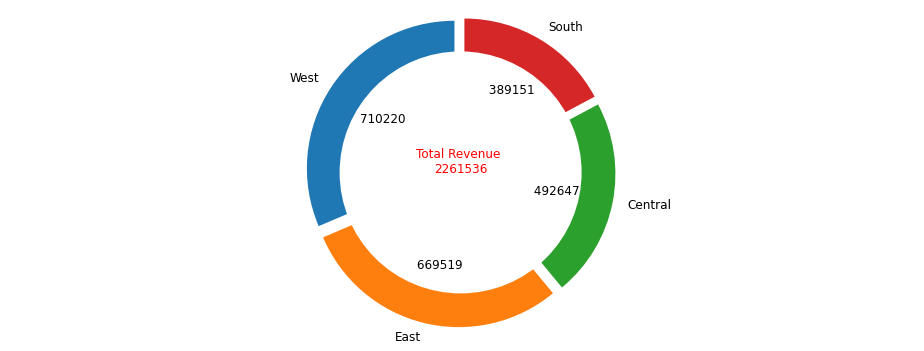

In [118]:
region = df.groupby(['Region']).sum().sort_values('Sales', ascending=False).head(30)

region = region[['Sales']]
region['Sales'] = region['Sales'].round(2)

total_sales = int(region['Sales'].sum())

region.reset_index(inplace=True)

plt.rcParams["figure.figsize"] = (13,5) 
plt.rcParams['font.size'] = 12.0 
plt.rcParams['font.weight'] = 6 

def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' {v:d}'.format(v=val)
    return my_format

explode = (0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(region['Sales'], labels=region['Region'], autopct= autopct_format(region['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_sales),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

Sales by Category

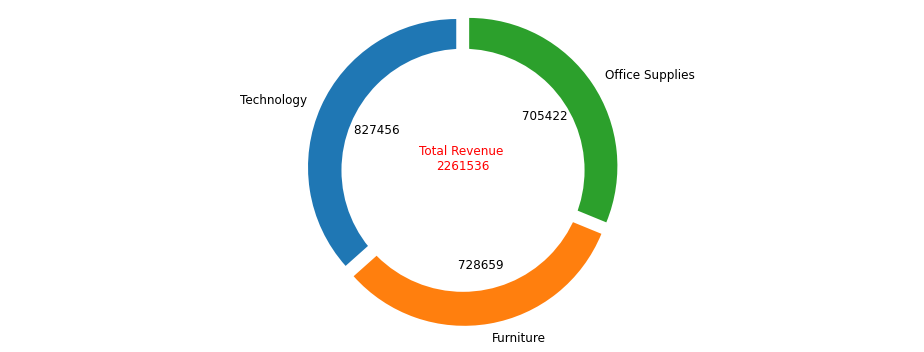

In [119]:
category = df.groupby(['Category']).sum().sort_values('Sales', ascending=False).head(30)

category = category[['Sales']]
category['Sales'] = category['Sales'].round(2)

total_sales = int(category['Sales'].sum())

category.reset_index(inplace=True)

plt.rcParams["figure.figsize"] = (13,5) 
plt.rcParams['font.size'] = 12.0 
plt.rcParams['font.weight'] = 6 

def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' {v:d}'.format(v=val)
    return my_format

explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(category['Sales'], labels=category['Category'], autopct= autopct_format(category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_sales),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

checking for correlation

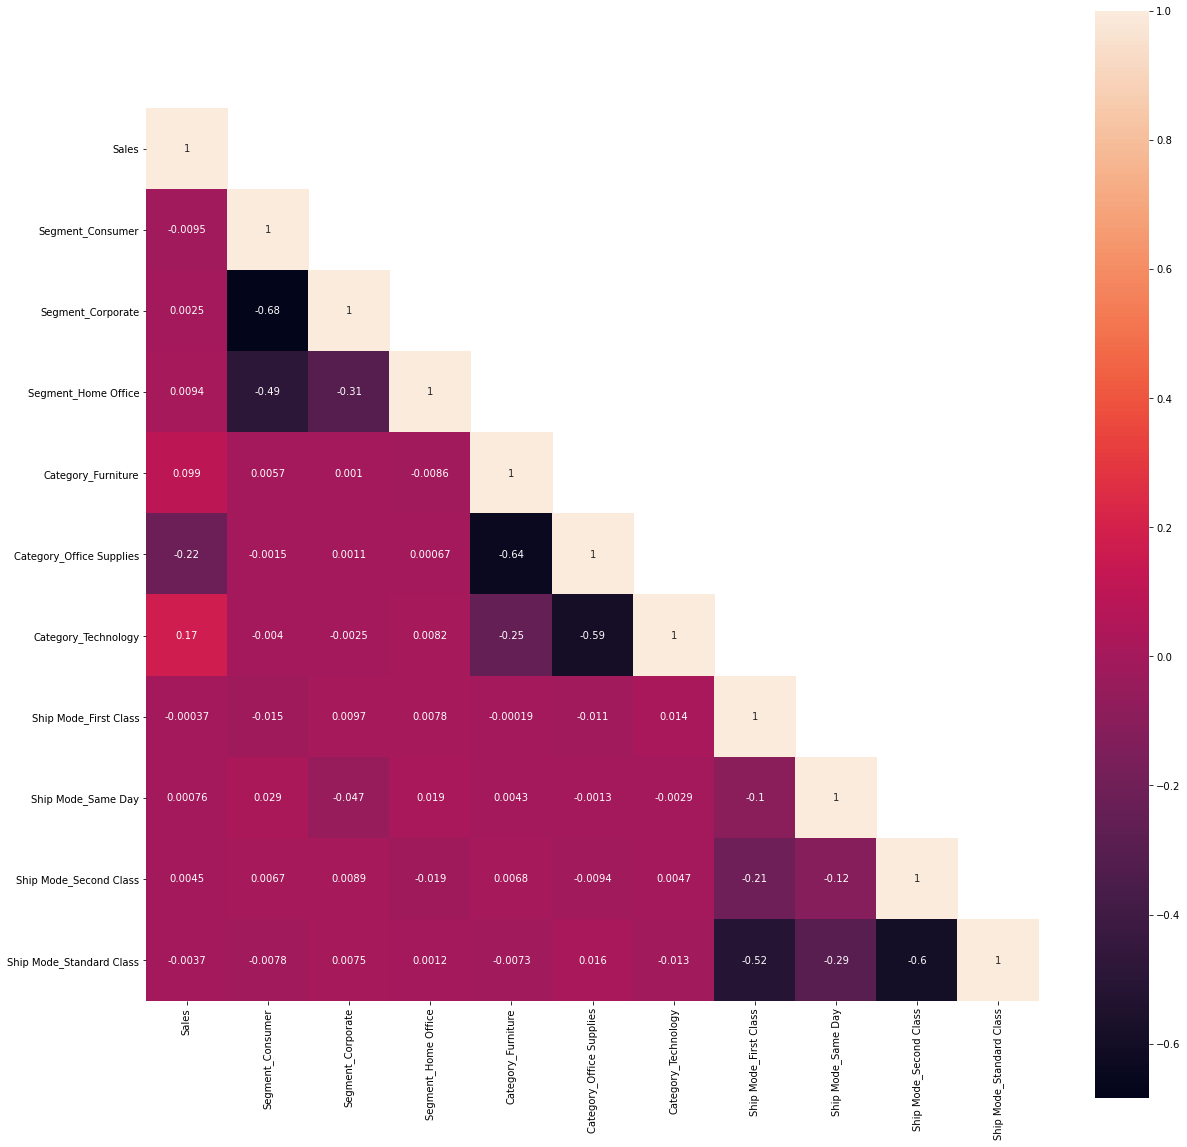

In [81]:
df1 = df[['Segment','Category','Ship Mode','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,20)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

converting the dataset to daily sales

In [129]:
sales = df[['Order Date','Sales']]
sales = sales.reset_index().groupby(by=['Order Date']).agg({'Sales':sum})
sales.sort_index(inplace=True)
sales.head()

,Sales
Order Date,
2015-01-02,468.90
2015-01-03,2203.15
2015-01-04,119.89
2015-01-06,5188.52
2015-01-07,601.02


In [130]:
sales.describe()

,Sales
count,1230.000000
mean,1838.647602
std,2295.418256
min,2.020000
25%,378.515000
50%,1058.395000
75%,2382.220000
max,28106.730000
